In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import math

## Question 1

In [2]:
def contrast_sensitivity_function(size,resolution,available_distance):
    optimal_distance = (size[0]*6)/(resolution[0]*math.tan(0.5*math.pi/180))
    if(optimal_distance <= available_distance):
        return optimal_distance
    else:
        return available_distance
    

# this is for 60 inch tv with full hd resolution widthxheight in inches
size,resolution = [52.3,29.4],[1920,1080]
result = contrast_sensitivity_function(size,resolution,100) #avialable distance is 100 inches
print(f'optimum distance is {result} inches')

optimum distance is 18.728082505509036 inches


## Question 2

### 1)

aerial image as array: [[122 182 184 ... 137 136 130]
 [129 178 188 ... 128 135 146]
 [166 170 185 ... 134 131 152]
 ...
 [102 138 125 ...  87  82  93]
 [ 92 146 127 ...  78  83  90]
 [  2   2   4 ...  29  25  32]]


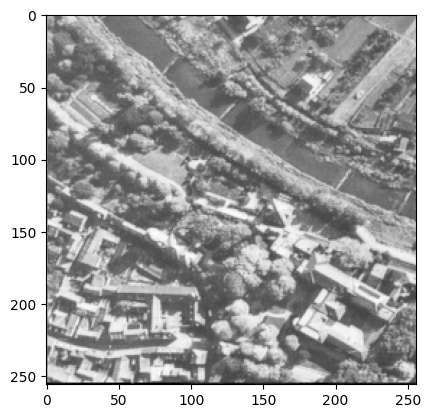

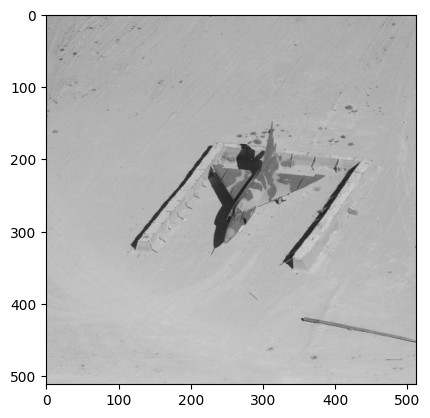

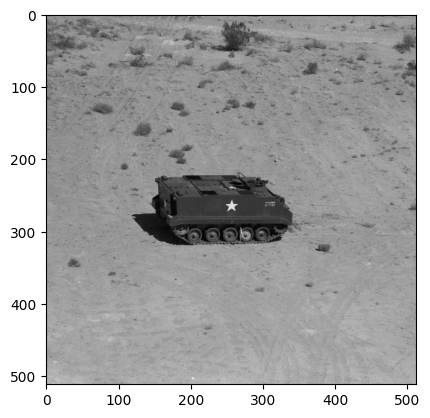

In [3]:
aerial = mpimg.imread('./misc/5.1.10.tiff')
airplane = mpimg.imread('./misc/7.1.02.tiff')
APC =  mpimg.imread('./misc/7.1.08.tiff')

print('aerial image as array:',aerial)
plt.imshow(aerial,cmap = 'gray')
plt.show()

plt.imshow(airplane,cmap = 'gray')
plt.show()

plt.imshow(APC,cmap = 'gray')
plt.show()

### 2)

In [4]:
def max_min(I):
    I = np.array(I)
    return np.max(I),np.min(I)

aerial_max,aerial_min = max_min(aerial)
print('aerial_max :',aerial_max,'aerial_min:',aerial_min,'width:',len(aerial[0]),'height:',len(aerial))

airplane_max,airplane_min = max_min(airplane)
print('airplane_max :',airplane_max,'airplane_min:',airplane_min,'width:',len(airplane[0]),'height:',len(airplane))

APC_max,APC_min = max_min(APC)
print('APC_max :',APC_max,'APC_min:',APC_min,'width:',len(APC[0]),'height:',len(APC))
    

aerial_max : 248 aerial_min: 1 width: 256 height: 256
airplane_max : 250 airplane_min: 3 width: 512 height: 512
APC_max : 215 APC_min: 12 width: 512 height: 512


- we can see from the above data the min is close to 1 the max is 250,so it should take >> 128 values so we should use minimum of 8 bits if we use 7 bits only 128 values are possible but 8 bits allows for 256 possible values for intensity.

- we have $Resolution = Width×Height$ that is for aerial we have $256\times256 = 65,536 pixels$ and for airplane and APC we have resolution as  $512\times512 = 262,144 pixels$

### 3)

In [5]:
def file_size(name):
    temp = os.path.getsize(f'./misc/{name}')
    return temp

print('size of aerial:',file_size('5.1.10.tiff'),'bytes')
print('size of airplane:',file_size('7.1.02.tiff'),'bytes')
print('size of APC:',file_size('7.1.08.tiff'),'bytes')


size of aerial: 65670 bytes
size of airplane: 262278 bytes
size of APC: 262278 bytes


- we know 1 byte is 8 bits then using 8 bits per pixel we should have size equal to resolution for aerial we should have 65,536 bytes which is close to actual size of 65,670bytes which is slightly higher this is due to metadata of image(example image_name).similar observation can be made for other images.

- we can see that images are not effectively compressed with respective to 8 bits per pixel size.they are almost same size.

### 4)

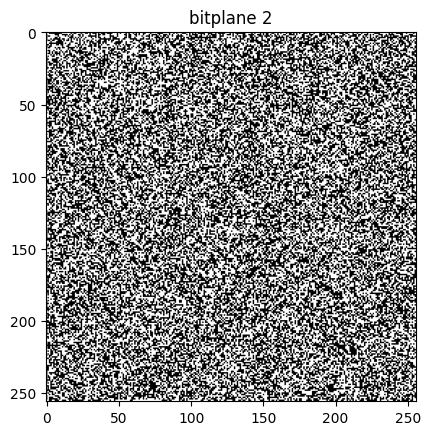

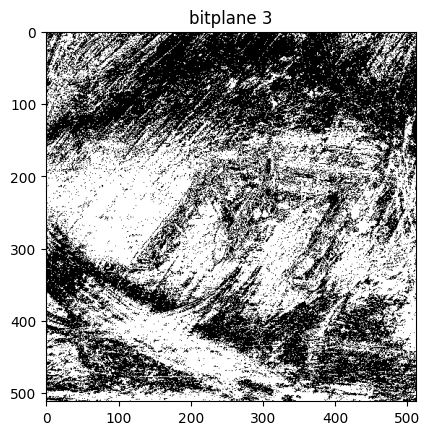

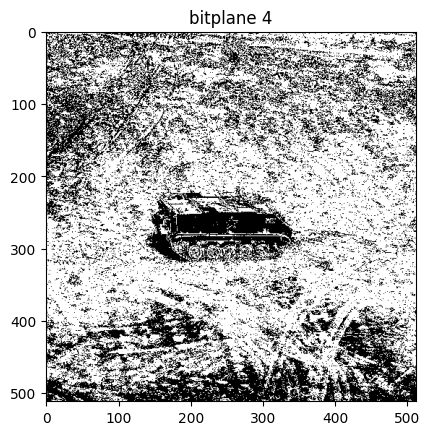

convention : b = 0 corresponds to the least significant bitplane


In [6]:
def bitplane_img(I,b):
    I_max = np.max(I)
    B = np.ceil(np.log2(I_max))
    
    if (b < 0) or (b > B - 1):
        print('invalid b')
        return
        
    I_b = (I >> b)&1
    plt.imshow(I_b, cmap='binary')
    plt.title(f'bitplane {b}')
    plt.show()
    return I_b

bitplane_img(aerial,2)
bitplane_img(airplane,3)
bitplane_img(APC,4)   
print('convention : b = 0 corresponds to the least significant bitplane')

## Question 3

### 1)

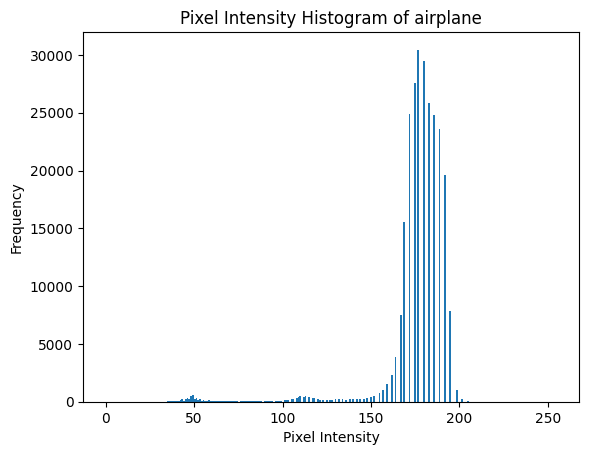

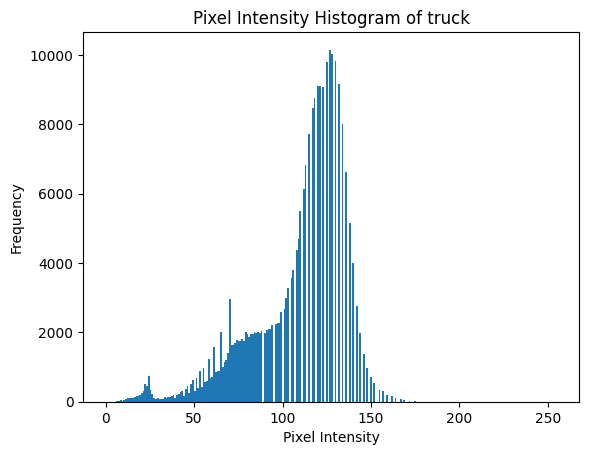

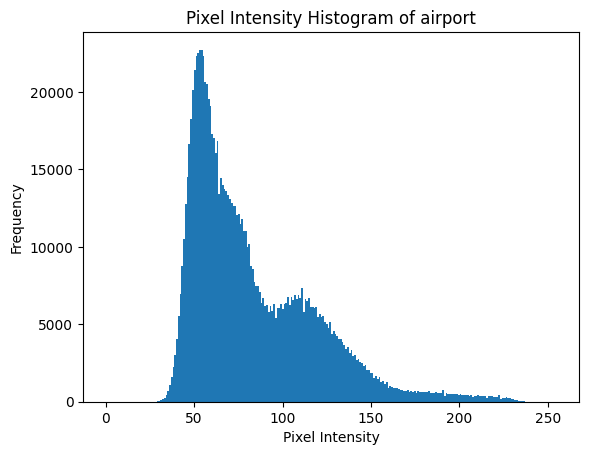

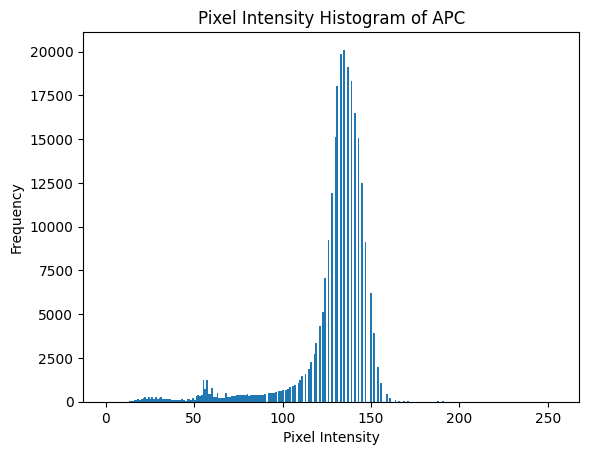

In [7]:
airplane = mpimg.imread('./misc/7.1.02.tiff')
truck = mpimg.imread('./misc/7.1.01.tiff')
airport =  mpimg.imread('./misc/5.3.02.tiff')
APC =  mpimg.imread('./misc/7.1.08.tiff')

def plot_histogram(I,name):
    I_flat = np.array(I).flatten()
    plt.hist(I_flat,bins=256, range=(0, 255))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'Pixel Intensity Histogram of {name}')
    plt.show()
    
plot_histogram(airplane,"airplane")
plot_histogram(truck,"truck")
plot_histogram(airport,"airport")
plot_histogram(APC,"APC")

- modality of airplane is 1
- modality of truck is 2
- modality of airport is 2
- modality of APC is 1


### 2)

- for bimodal plots choosing threshold in between peaks is best choice
- for uni modal choosing threshold in at the peak is best choice

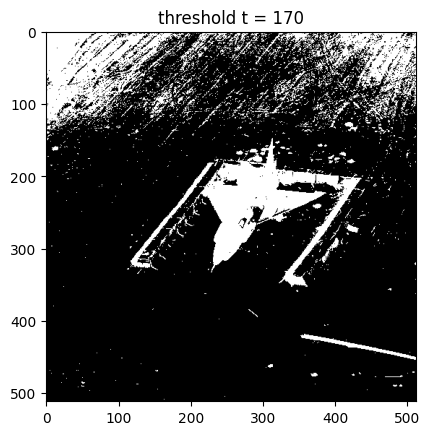

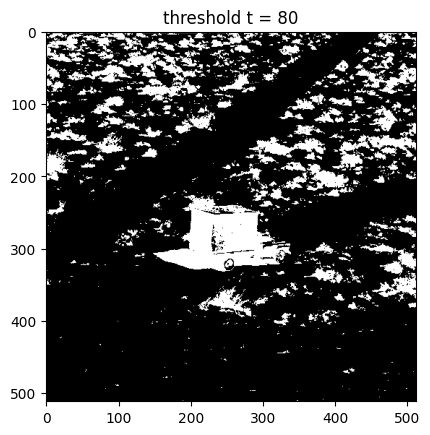

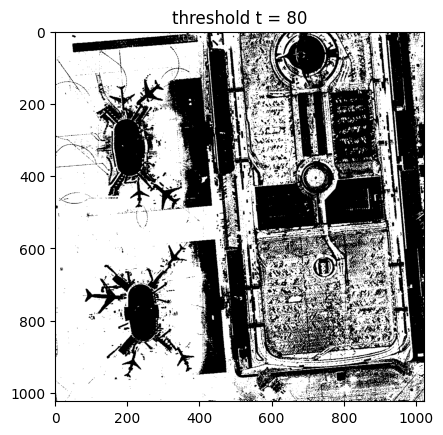

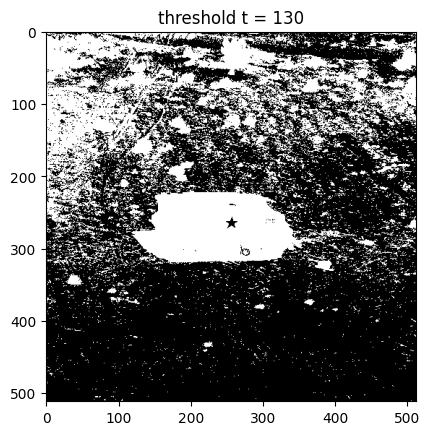

In [8]:
def threshold_img(I,T):
    I = np.array(I)
    I = (I >= T).astype(int)
    return I


plt.imshow(threshold_img(airplane,170), cmap='binary')
plt.title(f'threshold t = 170')
plt.show()

plt.imshow(threshold_img(truck,80), cmap='binary')
plt.title(f'threshold t = 80')
plt.show()

plt.imshow(threshold_img(airport,80), cmap='binary')
plt.title(f'threshold t = 80')
plt.show()

plt.imshow(threshold_img(APC,130), cmap='binary')
plt.title(f'threshold t = 130')
plt.show()

### 3)

In [9]:
def calc_mean(arr,weights):
    return  np.sum(arr*weights)
    
def calc_var(arr, weights):
    mean = calc_mean(arr, weights)
    sqdiff = (arr - mean)**2
    weighted_variance = np.sum(weights * sqdiff)
    return weighted_variance

 * a)

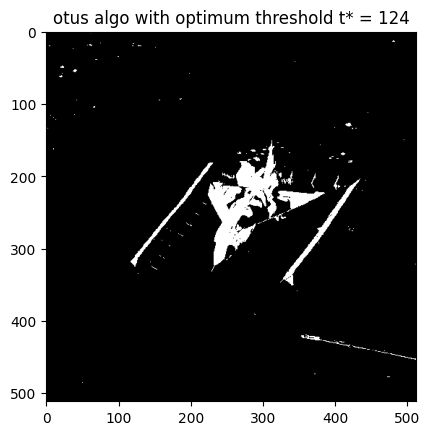

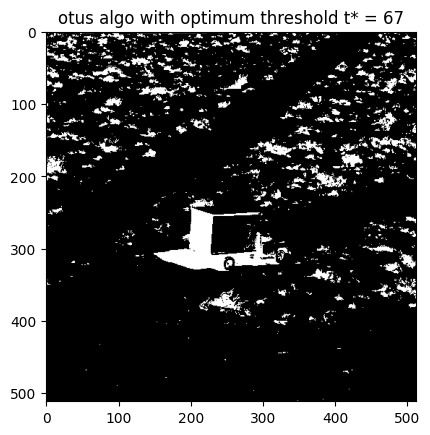

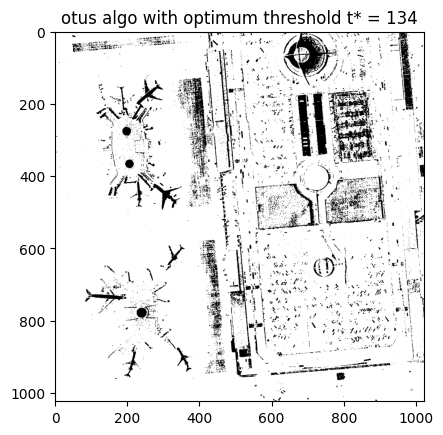

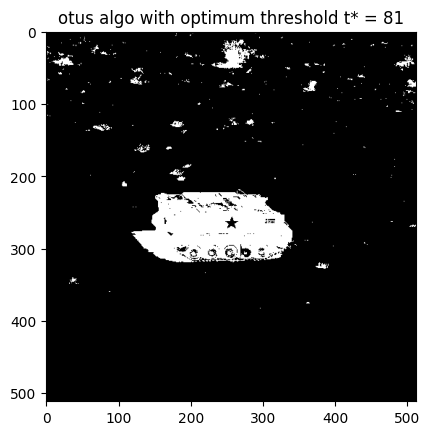

81

In [10]:
def otus_method1(I):
    I_max = np.max(I)
    B = int(np.ceil(np.log2(I_max)))
    prob = np.zeros((2**B))
    values = np.arange((2**B))
    total_px = len(I)*len(I[0])

    for arr in I:
        for i in arr:
            prob[i] += 1
            
    prob /= total_px
    inter_class_var = []
    total_var = calc_var(values,prob)
    inter_class_var.append(total_var) # for t = 0
    for t in range(1,(2**B)-1):
        prob_0_t = np.sum(prob[:t])
        prob_1_t = 1 - prob_0_t
        var_0_t = calc_var(values[:t],prob[:t])
        var_1_t = calc_var(values[t:],prob[t:])
        inter_class_var.append( prob_0_t*var_0_t + prob_1_t*var_1_t )

    inter_class_var.append(total_var) # for t = (2**B) - 1
    min_t = np.argmin(np.array(inter_class_var))
    
    I = threshold_img(I,min_t)
    plt.imshow(I, cmap='binary')
    plt.title(f'otus algo with optimum threshold t* = {min_t}')
    plt.show()
    return min_t
    
otus_method1(airplane)
otus_method1(truck)
otus_method1(airport)
otus_method1(APC)

 * b)

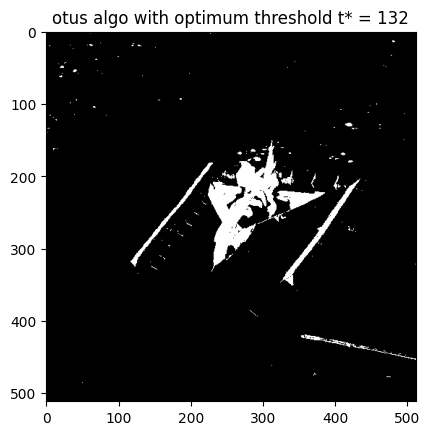

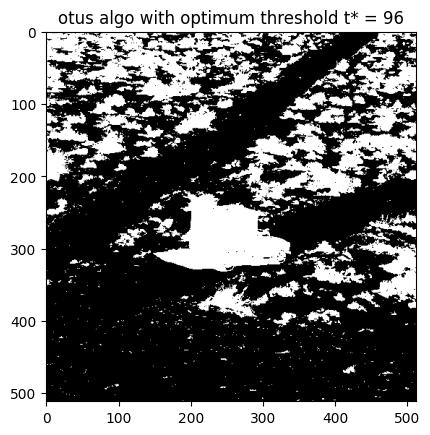

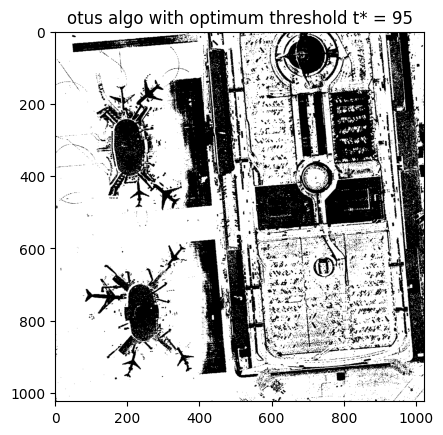

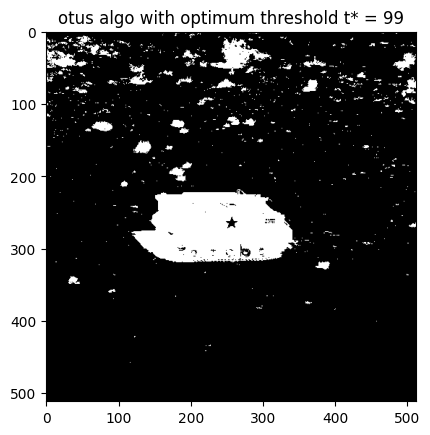

In [11]:
def otus_method2(I):
    I_max = np.max(I)
    B = int(np.ceil(np.log2(I_max)))
    prob = np.zeros((2**B))
    values = np.arange((2**B))
    total_px = len(I)*len(I[0])

    for arr in I:
        for i in arr:
            prob[i] += 1
            
    prob /= total_px
    
    P_t_0 = 0
    mean_t_0 = 0
    total_mean = calc_mean(values,prob)
    total_var = calc_var(values,prob)
    var_b = []
    var_b.append(0)
    for t in range(0,(2**B)-1):
        P_t_1_0 = P_t_0 + prob[t+1]
        
        if (P_t_1_0 == 0):
            mean_t_1_0 = 0
            mean_t_1_1 = total_mean
            var_b.append(0)
            #update terms
            P_t_0 = P_t_1_0
            mean_t_0 = mean_t_1_0
            continue
            
        if(P_t_1_0 == 1):
            mean_t_1_0 = total_mean
            mean_t_1_1 = 0
            var_b.append(0)
            #update terms
            P_t_0 = P_t_1_0
            mean_t_0 = mean_t_1_0
            continue
          
        mean_t_1_0 = (mean_t_0*P_t_0 + (t+1)*prob[t+1])/P_t_1_0
        mean_t_1_1 = (total_mean - mean_t_1_0*P_t_1_0)/(1 - P_t_1_0)
        var_b.append((P_t_1_0)*(1 - (P_t_1_0))*((mean_t_1_0 - mean_t_1_1)**2))
        #update terms
        P_t_0 = P_t_1_0
        mean_t_0 = mean_t_1_0
    var_b.append(0)
    
    max_t = np.argmax(np.array(var_b))   
    I = threshold_img(I,max_t)
    plt.imshow(I, cmap='binary')
    plt.title(f'otus algo with optimum threshold t* = {max_t}')
    plt.show()
    return max_t,I

_,bin_airplane = otus_method2(airplane)
_,bin_truck = otus_method2(truck)
_,bin_airport = otus_method2(airport)
_,bin_APC = otus_method2(APC)

### 4)

In [12]:
class connected_components:
    def __init__(self, image):
        self.image = image
        self.result = np.zeros_like(image)
        self.count = 0
        self.connections = []

    def check(self, i, j):
        if i == 0 and j == 0:
            self.count += 1
            self.result[i][j] = self.count
            
        if i == 0:
            if self.image[i][j-1] == 1:
                self.result[i][j] = self.result[i][j-1]
            else:
                self.count += 1
                self.result[i][j] = self.count
                

        if j == 0:
            if self.image[i-1][j] == 1:
                self.result[i][j] = self.result[i-1][j]
            else:
                self.count += 1
                self.result[i][j] = self.count
                

        if self.image[i][j-1] == 1:
            if self.image[i-1][j] == 1:
                min_comp = min(self.result[i-1][j], self.result[i][j-1])
                max_comp = max(self.result[i-1][j], self.result[i][j-1])
                self.result[i][j] = min_comp
                if min_comp != max_comp:
                    self.connections.append([min_comp,max_comp])
            else:
                self.result[i][j] = self.result[i][j-1]
        else:
            if self.image[i-1][j] == 1:
                self.result[i][j] = self.result[i-1][j]
            else:
                self.count += 1
                self.result[i][j] = self.count
                
        return

    def find(self):
        for i in range(self.image.shape[0]):
            for j in range(self.image.shape[1]):
                if self.image[i][j] == 1: self.check(i, j)

        # union find algorithm
        parent = [i for i in range(self.count + 1)]

        def find_ult_parent(x):
            if parent[x] == x:
                return x
            parent[x] = find_ult_parent(parent[x])
            return parent[x]

        def union(x, y):
            px = find_ult_parent(x)
            py = find_ult_parent(y)
            if px != py:
                parent[max(px,py)] = min(px,py)

        for i in self.connections:
            union(i[0],i[1])

        for i in range(self.result.shape[0]):
            for j in range(self.result.shape[1]):
                self.result[i][j] = find_ult_parent(self.result[i][j])

        return self.result

In [13]:
airplane_components = connected_components(bin_airplane)
I = airplane_components.find()
print('noof connected components:',airplane_components.count)

airport_components = connected_components(bin_airport)
I = airport_components.find()
print('noof connected components:',airport_components.count)

truck_components = connected_components(bin_truck)
I = truck_components.find()
print('noof connected components:',truck_components.count)

noof connected components: 477
noof connected components: 17636
noof connected components: 2357


### 5)

In [14]:
def minor_blob_removal(image_, components):  
    image = np.copy(image_)
    sizes = {}
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] == 1:
                label = components[i][j]
                if label in sizes:
                    sizes[label] += 1
                else:
                    sizes[label] = 1
                
    largest_size = max(sizes.values())
    largest_label = max(sizes, key=sizes.get)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] == 1 and components[i][j] != largest_label:
                image[i][j] = 0
                
    # complement
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i][j] = 1 - image[i][j]

    temp = connected_components(image)
    marked = temp.find()
    
    # largest component is background
    sizes.clear()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] == 1:
                label = marked[i][j]
                if label in sizes:
                    sizes[label] += 1
                else:
                    sizes[label] = 1

    largest_size = max(sizes.values())
    largest_label = max(sizes, key=sizes.get)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] == 1 and marked[i][j] != largest_label:
                image[i][j] = 0
    
    # complement
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i][j] = 1 - image[i][j]

    return image


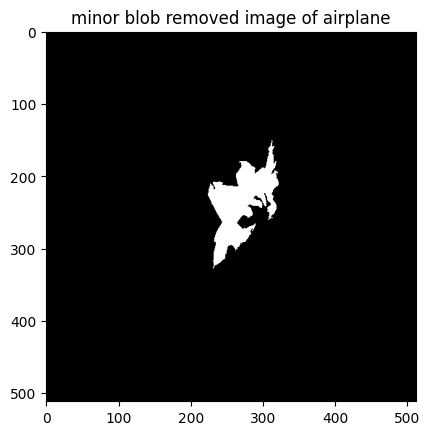

In [15]:
airplane_components = connected_components(bin_airplane)
I = airplane_components.find()
blob_removed_img = minor_blob_removal(bin_airplane,I)
plt.imshow(blob_removed_img, cmap='binary')
plt.title(f'minor blob removed image of airplane')
plt.show()

## Question 4

### 1)

In [16]:
def SQUARE(n):
    if(n % 2 == 0):
        print('invalid size')
        return 
    return np.ones((n,n))

def CROSS(m):
    n = (m+1)//2
    if(n % 2 == 0):
        print('invalid size')
        return 
    arr = np.zeros((n,n))
    mid = (n-1)//2
    for i in range(0,n):
        arr[i][mid] = 1
        arr[mid][i] = 1
    return arr

In [17]:
def rotate1(image): #rotate matrix along diag with slop -45 deg.
    result = np.zeros_like(image)
    for i in range(len(image)):
        for j in range(len(image[0])):
            result[i][j] = image[len(image[0])-1 - j][len(image)-1 - i]
    return result

def rotate2(image): #rotate matrix along diag with slop +45 deg.
    result = image.T
    return result

def pad_img(image, window):
    padded_img = np.zeros(((len(window) - 1) + len(image), (len(window) - 1) + len(image[0]) ))
    temp = len(window) // 2
    padded_img[temp:-temp, temp:-temp] = image
    
    padded_img[temp:-temp, 0:temp] = np.flip(image[:, 0:temp], axis=1)
    padded_img[temp:-temp, -temp:] = np.flip(image[:,-temp:], axis=1)
    padded_img[0:temp, temp:-temp] = np.flip(image[0:temp, :], axis=0)
    padded_img[-temp:, temp:-temp] = np.flip(image[-temp:,:], axis=0)
    
    padded_img[0:temp,0:temp] =  rotate1(image[0:temp,0:temp])
    padded_img[0:temp,-temp:] = rotate2(image[0:temp,-temp:])
    padded_img[-temp:,0:temp] = rotate2(image[-temp:,0:temp])
    padded_img[-temp:,-temp:] = rotate1(image[-temp:,-temp:])
    return padded_img

def dilate(image, window):
    padded_img = pad_img(image, window)
    result = np.zeros_like(image)
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            section = padded_img[i:i+window.shape[0], j:j+window.shape[1]]
            dot_product = np.dot(section.flatten(), window.flatten())
            result[i, j] = 1 if (dot_product >= 1) else 0
    return result

def erode(image, window):
    padded_img = pad_img(image, window)
    result = np.zeros_like(image)
            
    for i in range(len(image)):
        for j in range(len(image[0])):
            section = padded_img[i:i+window.shape[0], j:j+window.shape[1]]
            dot_product = np.dot(section.flatten(), window.flatten())
            total = np.sum(window)
            result[i, j] = 1 if (dot_product == total) else 0
    return result

def median(image, window):
    padded_img = pad_img(image, window)
    result = np.zeros_like(image)
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            section = padded_img[i:i+window.shape[0], j:j+window.shape[1]]
            dot_product = np.dot(section.flatten(), window.flatten())
            total = np.sum(window)
            result[i, j] = 1 if (dot_product > (total - 1)/2 ) else 0
    return result


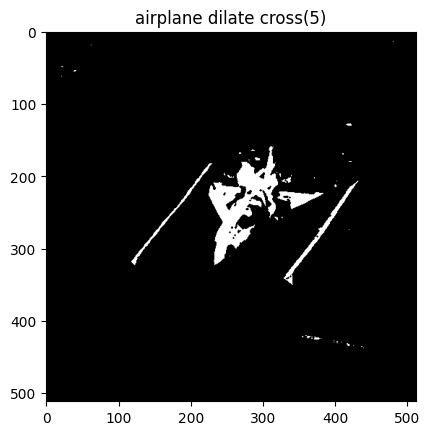

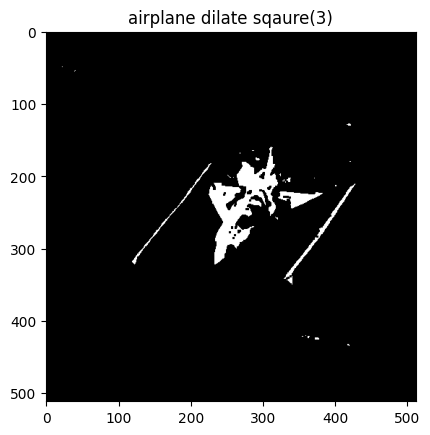

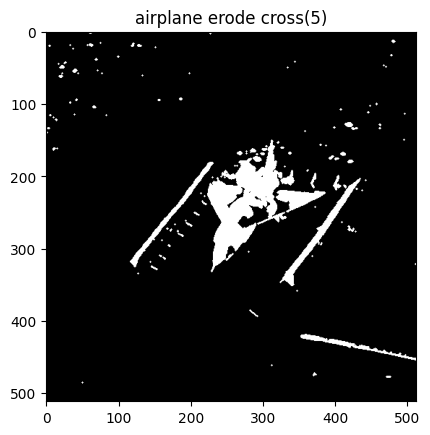

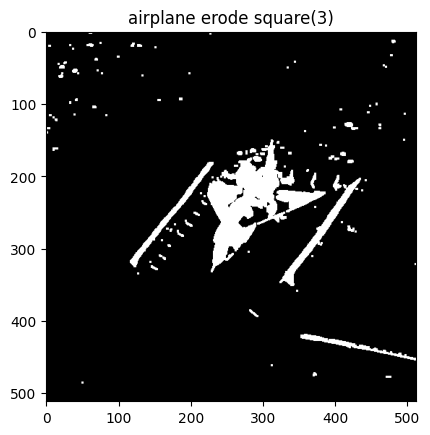

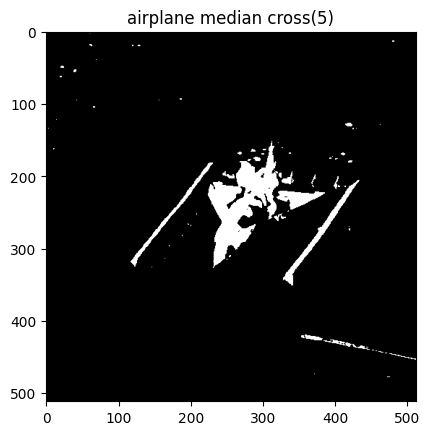

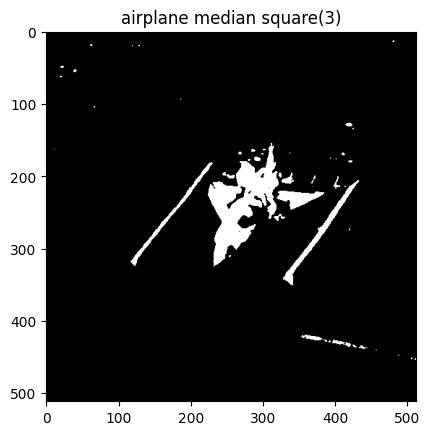

In [18]:
c_5 = CROSS(5)
sq_3 = SQUARE(3)

plt.imshow(dilate(bin_airplane,c_5), cmap='binary')
plt.title(f'airplane dilate cross(5)')
plt.show()

plt.imshow(dilate(bin_airplane,sq_3), cmap='binary')
plt.title(f'airplane dilate sqaure(3)')
plt.show()

plt.imshow(erode(bin_airplane,c_5), cmap='binary')
plt.title(f'airplane erode cross(5)')
plt.show()

plt.imshow(erode(bin_airplane,sq_3), cmap='binary')
plt.title(f'airplane erode square(3)')
plt.show()

plt.imshow(median(bin_airplane,c_5), cmap='binary')
plt.title(f'airplane median cross(5)')
plt.show()

plt.imshow(median(bin_airplane,sq_3), cmap='binary')
plt.title(f'airplane median square(3)')
plt.show()

### 2)

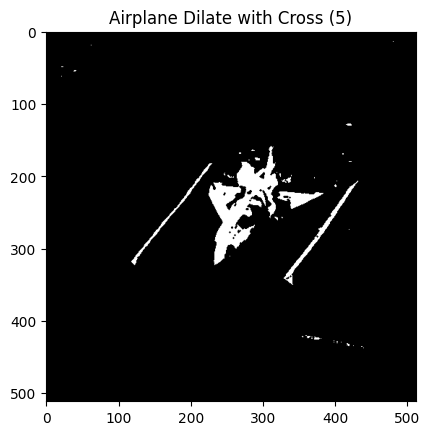

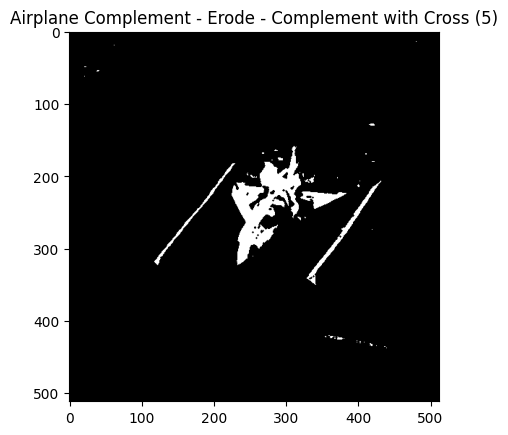

The images are identical.


In [19]:
# Dilate
dilate_airplane = dilate(bin_airplane, c_5)

# Complement - Erode - Complement
temp = erode(1 - bin_airplane, c_5)
temp = 1 - temp

plt.imshow(dilate_airplane, cmap='binary')
plt.title('Airplane Dilate with Cross (5)')
plt.show()

plt.imshow(temp, cmap='binary')
plt.title('Airplane Complement - Erode - Complement with Cross (5)')
plt.show()

difference = np.sum(dilate_airplane != temp)
if difference == 0:
    print("The images are identical.")
else:
    print("The images are not same.")

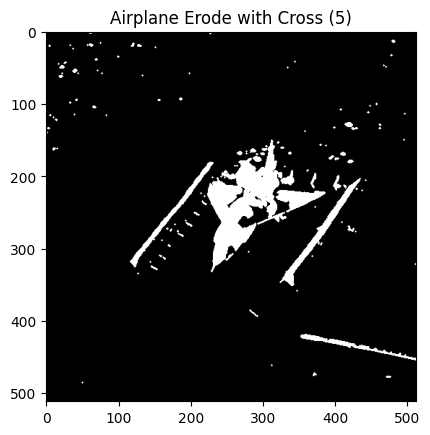

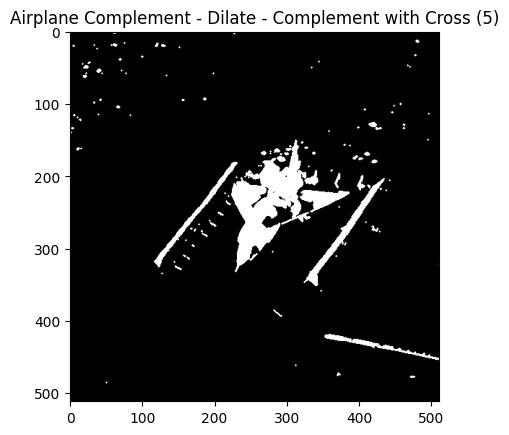

The images are identical.


In [20]:
# Erode
erode_airplane = erode(bin_airplane, c_5)

# Complement - Dilate - Complement
temp = dilate(1 - bin_airplane, c_5)
temp = 1 - temp

plt.imshow(erode_airplane, cmap='binary')
plt.title('Airplane Erode with Cross (5)')
plt.show()

plt.imshow(temp, cmap='binary')
plt.title('Airplane Complement - Dilate - Complement with Cross (5)')
plt.show()

difference = np.sum(erode_airplane != temp)
if difference == 0:
    print("The images are identical.")
else:
    print("The images are not the same.")

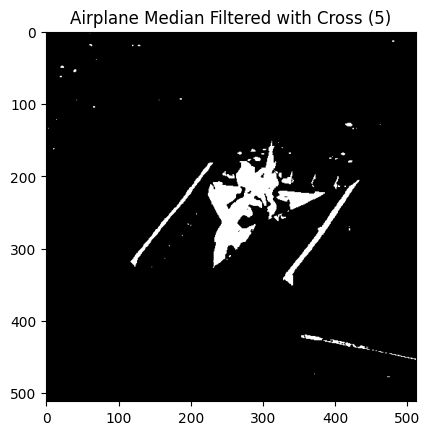

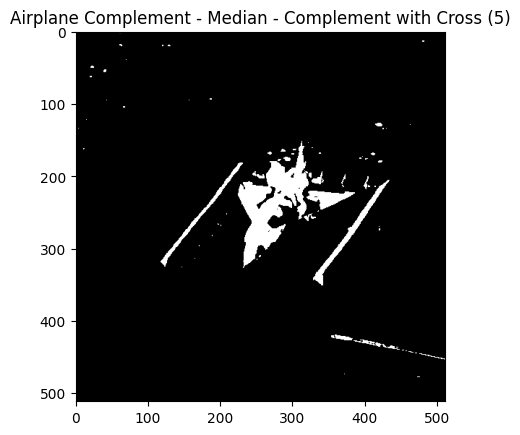

The images are identical.


In [21]:
# Median Filtering
median_airplane = median(bin_airplane, c_5)

# Complement - Median - Complement
temp = median(1 - bin_airplane, c_5)
temp = 1 - temp

plt.imshow(median_airplane, cmap='binary')
plt.title('Airplane Median Filtered with Cross (5)')
plt.show()

plt.imshow(temp, cmap='binary')
plt.title('Airplane Complement - Median - Complement with Cross (5)')
plt.show()

difference = np.sum(median_airplane != temp)
if difference == 0:
    print("The images are identical.")
else:
    print("The images are not the same.")

### 3)

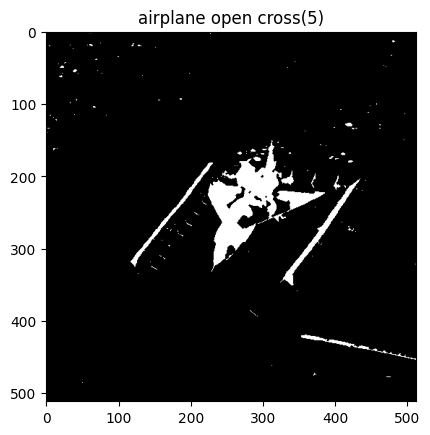

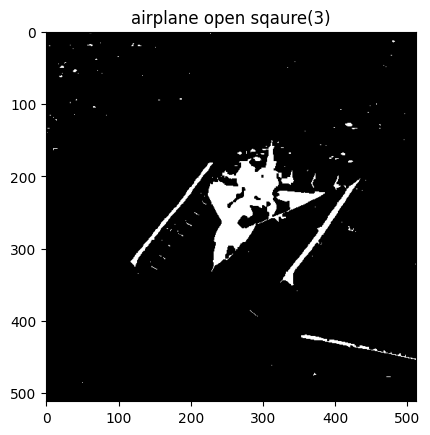

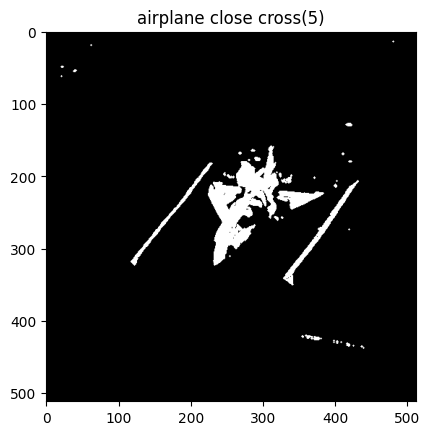

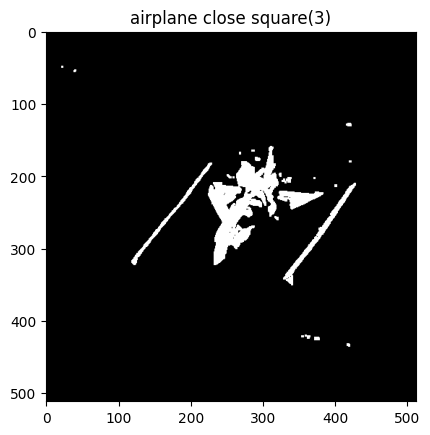

In [22]:
def OPEN(image,window):
    temp = erode(image,window)
    temp = dilate(temp,window)
    return temp
    
def CLOSE(image,window):
    temp = dilate(image,window)
    temp = erode(temp,window)
    return temp

plt.imshow(OPEN(bin_airplane,c_5), cmap='binary')
plt.title(f'airplane open cross(5)')
plt.show()

plt.imshow(OPEN(bin_airplane,sq_3), cmap='binary')
plt.title(f'airplane open sqaure(3)')
plt.show()

plt.imshow(CLOSE(bin_airplane,c_5), cmap='binary')
plt.title(f'airplane close cross(5)')
plt.show()

plt.imshow(CLOSE(bin_airplane,sq_3), cmap='binary')
plt.title(f'airplane close square(3)')
plt.show()


### 4)

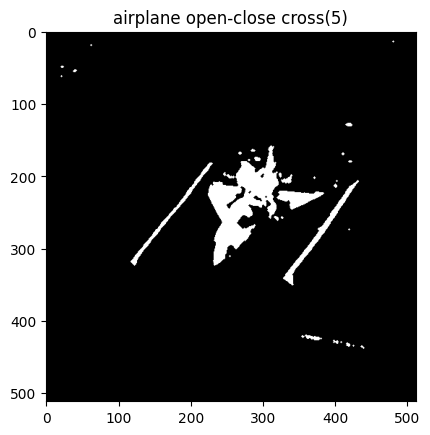

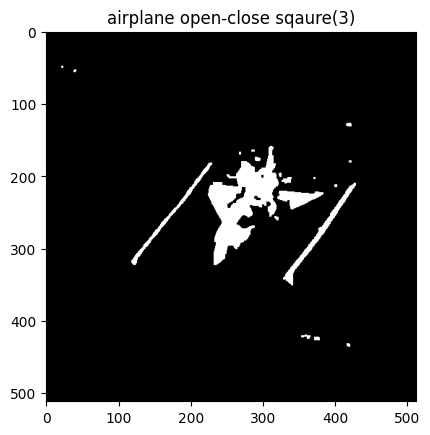

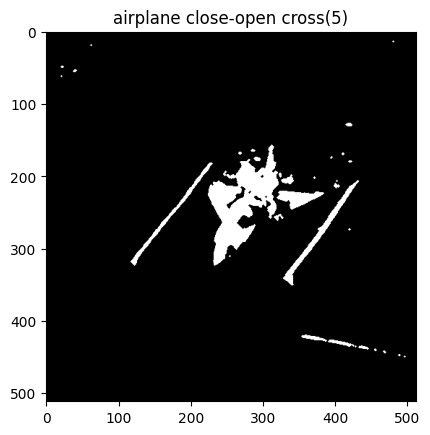

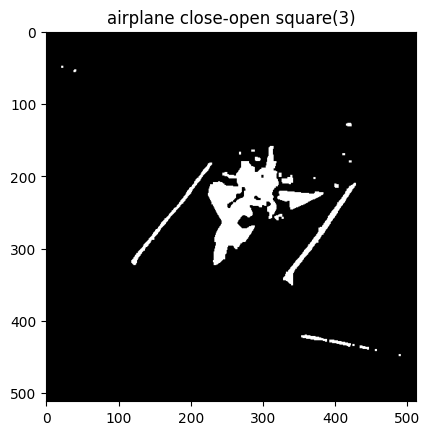

In [23]:
def OPEN_CLOSE(image,window):
    temp = CLOSE(image,window)
    temp = OPEN(temp,window)
    return temp
    
    
def CLOSE_OPEN(image,window):
    temp = OPEN(image,window)
    temp = CLOSE(temp,window)
    return temp

plt.imshow(OPEN_CLOSE(bin_airplane,c_5), cmap='binary')
plt.title(f'airplane open-close cross(5)')
plt.show()

plt.imshow(OPEN_CLOSE(bin_airplane,sq_3), cmap='binary')
plt.title(f'airplane open-close sqaure(3)')
plt.show()

plt.imshow(CLOSE_OPEN(bin_airplane,c_5), cmap='binary')
plt.title(f'airplane close-open cross(5)')
plt.show()

plt.imshow(CLOSE_OPEN(bin_airplane,sq_3), cmap='binary')
plt.title(f'airplane close-open square(3)')
plt.show()

### 5)

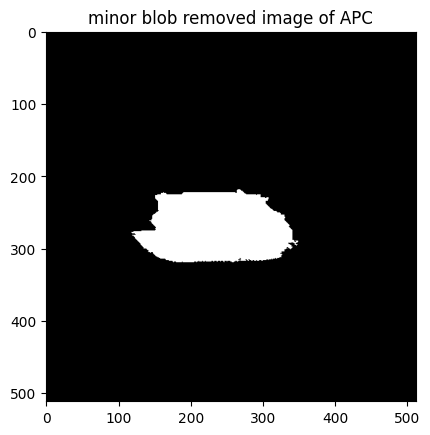

the number of pixels in the object of interest - i.e., the military vehicle. is 245039


In [24]:
APC_components = connected_components(bin_APC)
I = APC_components.find()
blob_removed_img = minor_blob_removal(bin_APC,I)
plt.imshow(blob_removed_img, cmap='binary')
plt.title(f'minor blob removed image of APC')
plt.show()

print(f'the number of pixels in the object of interest - i.e., the military vehicle. is { np.count_nonzero(blob_removed_img == 1)}')